#### Results

In this notebook we will walk through the results we obtained from the paper.

For each experiment we load the pretrained models and generate a grid that displays what the effect is of moving around in the latent space for a given sample.


In [1]:
# Import all the stuff that we use
import torch
from utils import *
import yaml
from yaml import Loader
from models.models_pl import Generic_model
from models.models_pl import *
from callbacks.generators import *
import torchvision
from IPython.display import Image 
from pytorch_lightning import seed_everything

In [2]:
def prepare_config(path_to_config, local=False):
    '''
    Prepares the config such that it can be used in this file
    
    '''
    
    config = yaml.load(open(path_to_config, "r"), Loader=Loader)
    config = to_vae_config(config)
    if not local:
        config['save_dir'] = './pretrained_models/'
    config = prepare_variables_pl(config)
    return config

def show_experiment_results(config):
    #Loading the encoder and decoder
    encoder, decoder = load_encoder_decoder(config)
    classifier = load_classifier(config)
    # Create model
    model = Generic_model(config, encoder, decoder, classifier, None).to(config['device'])
    train_loader, val_loader = select_dataloader(config)
    x_val = get_x_vals(val_loader, n_classes=config['number_of_classes'],
                   n_for_each_class=config['n_samples_each_class'])
    
    to_rgb = False if config['dataset'] == 'cifar10' else True
    samples = create_samples(x_val, model, to_rgb=to_rgb, show_probs=config['show_probs'])
    grids = create_latent_grids(samples, config["z_dim"], nrow=int(6/config['sweeping_stepsize'] + 1))
    imgs = []
    z_counter = 1
    z_name = "Alpha"
    for grid in grids:
        z_name, z_counter = print_info(z_name, z_counter, config)
        tensor = grid.cpu()
        img = torchvision.transforms.ToPILImage()(tensor)
        imgs.append(img)
        display(img)
        
def print_info(z_name, z_counter, config):
    if z_name == "Alpha" and z_counter == config['n_alpha'] + 1:
        z_name = "Beta"
        z_counter = 1
    
    if z_counter == 1:
        print("---------------------------------")
        
    print(z_name + ": " + str(z_counter))
    z_counter += 1
    
    return z_name, z_counter

### MNIST with digits 3 and 8

Global seed set to 42


Number of alpha-values: 1
Number of beta-values: 7
---------------------------------
Alpha: 1


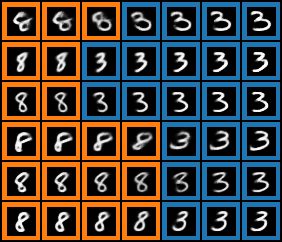

---------------------------------
Beta: 1


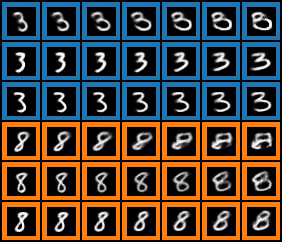

Beta: 2


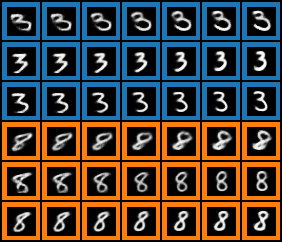

Beta: 3


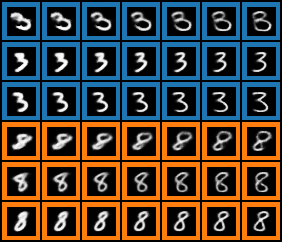

Beta: 4


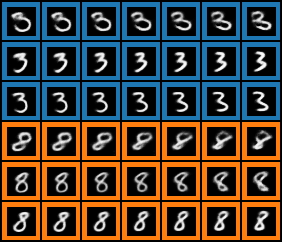

Beta: 5


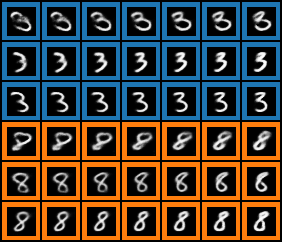

Beta: 6


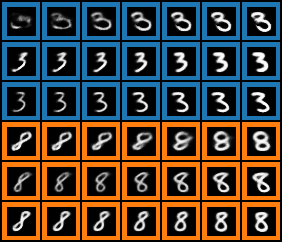

Beta: 7


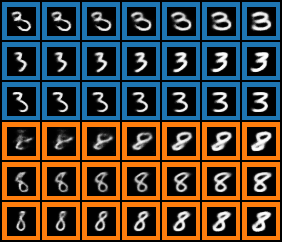

In [3]:
mnist_38_config_path = 'config/mnist_3_8.yml'
config = prepare_config(mnist_38_config_path)
seed_everything(config['seed'])
print("Number of alpha-values:", config['n_alpha'])
print("Number of beta-values:", config['n_beta'])
show_experiment_results(config)

### Complete MNIST

Global seed set to 42


Number of alpha-values: 3
Number of beta-values: 7
---------------------------------
Alpha: 1


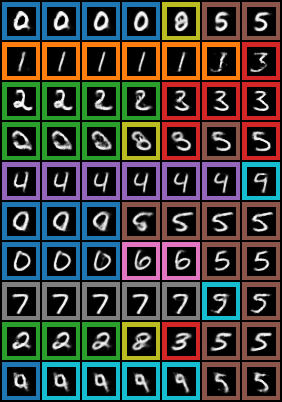

Alpha: 2


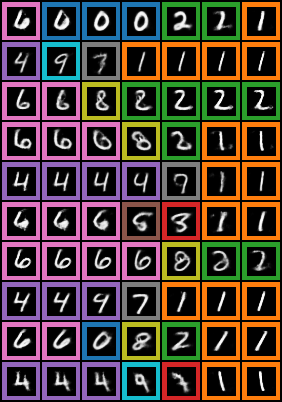

Alpha: 3


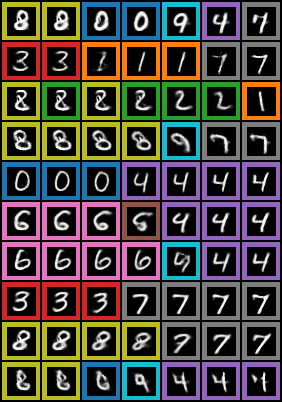

---------------------------------
Beta: 1


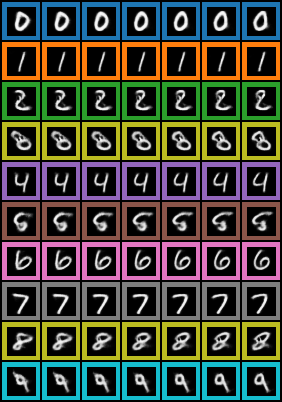

Beta: 2


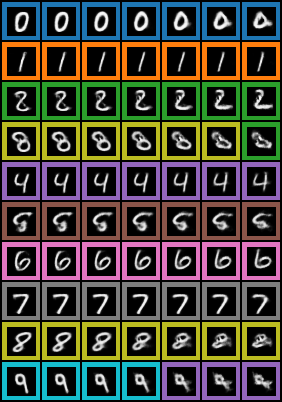

Beta: 3


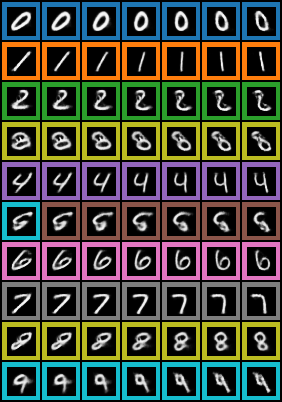

Beta: 4


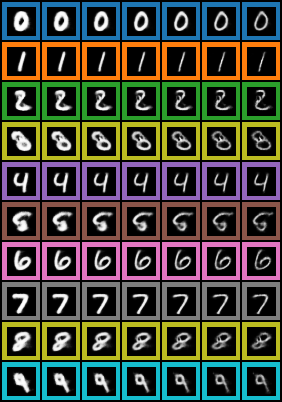

Beta: 5


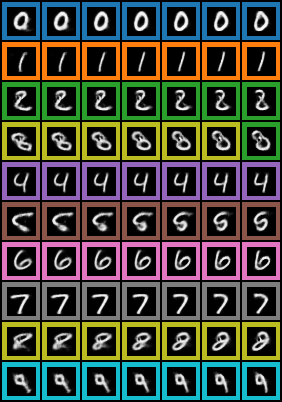

Beta: 6


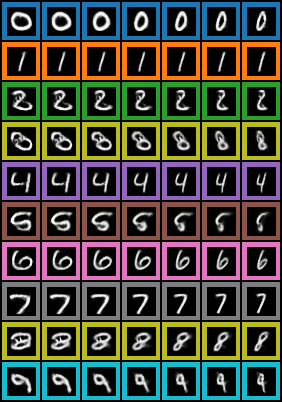

Beta: 7


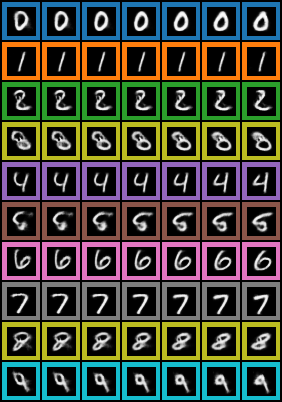

In [4]:
mnist_all_config_path = 'config/mnist_all.yml'
config = prepare_config(mnist_all_config_path)
seed_everything(config['seed'])
print("Number of alpha-values:", config['n_alpha'])
print("Number of beta-values:", config['n_beta'])
show_experiment_results(config)

### Fashion MNIST with tops, dresses and coats

Global seed set to 42


Number of alpha-values: 2
Number of beta-values: 4
---------------------------------
Alpha: 1


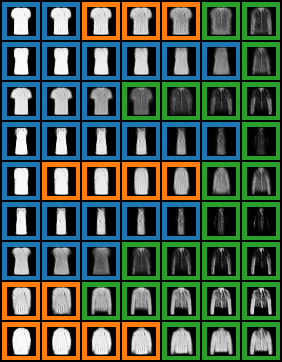

Alpha: 2


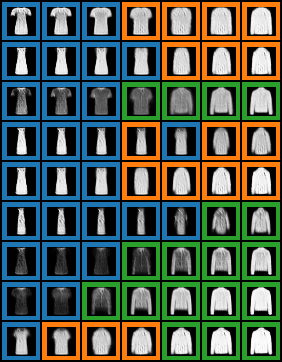

---------------------------------
Beta: 1


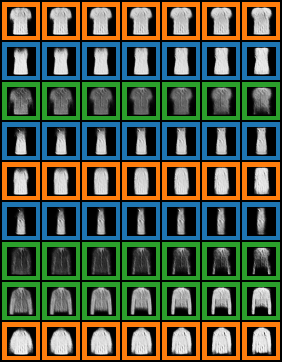

Beta: 2


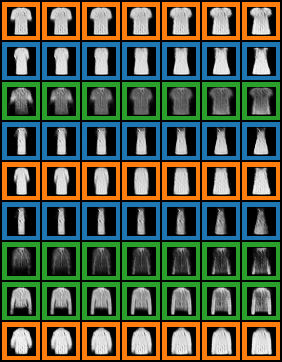

Beta: 3


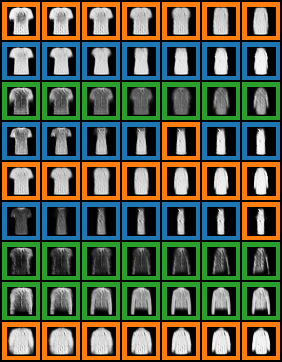

Beta: 4


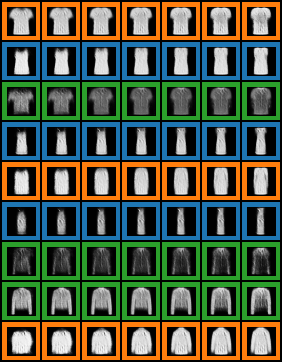

In [5]:
config_path = 'config/fmnist_0_3_4.yml'
config = prepare_config(config_path)
seed_everything(config['seed'])
print("Number of alpha-values:", config['n_alpha'])
print("Number of beta-values:", config['n_beta'])
show_experiment_results(config)

### Dummy example

Global seed set to 42


Number of alpha-values: 1
Number of beta-values: 7
---------------------------------
Alpha: 1


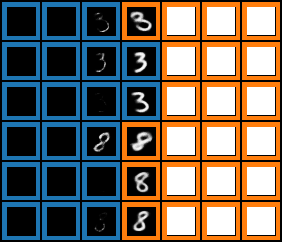

---------------------------------
Beta: 1


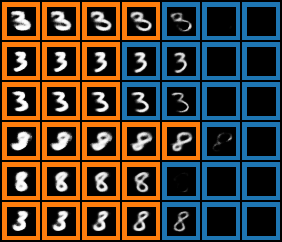

Beta: 2


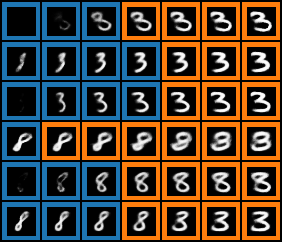

Beta: 3


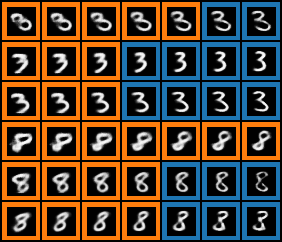

Beta: 4


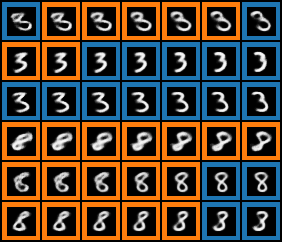

Beta: 5


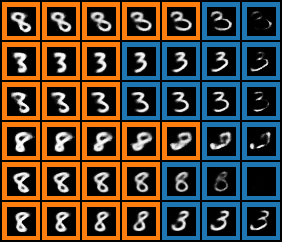

Beta: 6


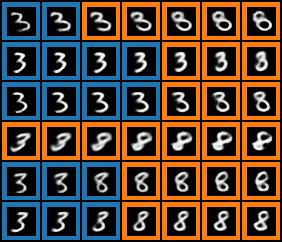

Beta: 7


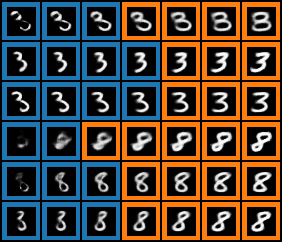

In [6]:
config_path = 'config/dummy.yml'
config = prepare_config(config_path)
seed_everything(config['seed'])
print("Number of alpha-values:", config['n_alpha'])
print("Number of beta-values:", config['n_beta'])
show_experiment_results(config)

Global seed set to 42


Number of alpha-values: 1
Number of beta-values: 63
Files already downloaded and verified
Files already downloaded and verified
---------------------------------
Alpha: 1


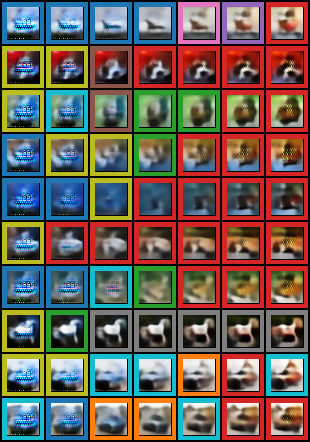

---------------------------------
Beta: 1


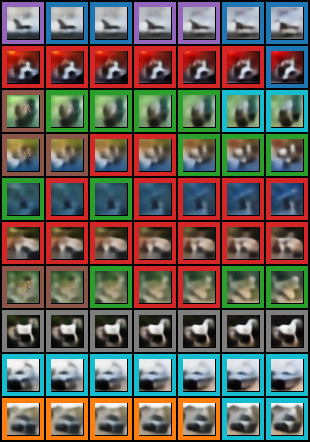

Beta: 2


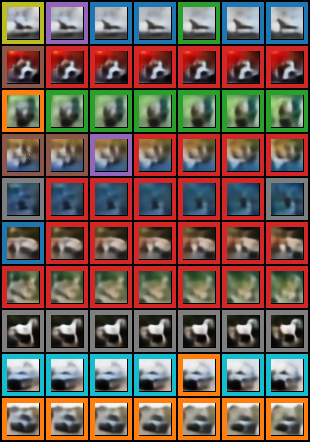

Beta: 3


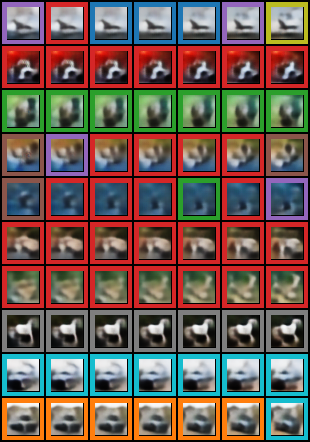

Beta: 4


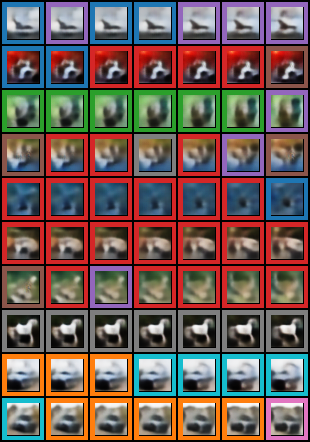

Beta: 5


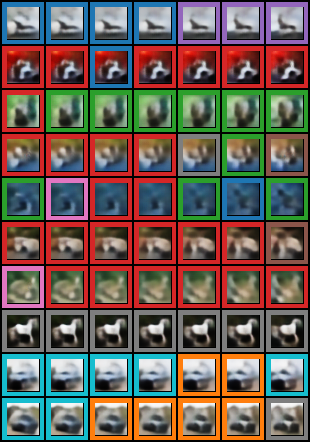

Beta: 6


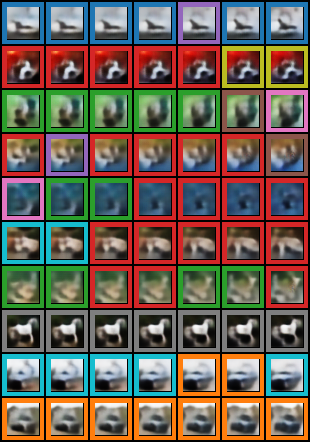

Beta: 7


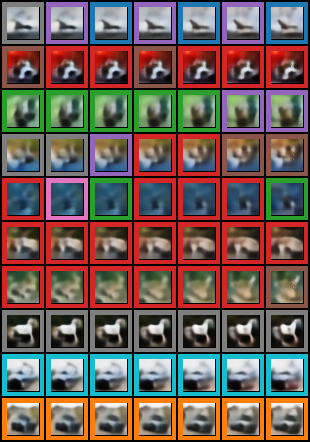

Beta: 8


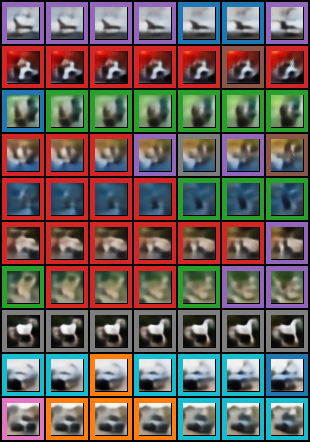

Beta: 9


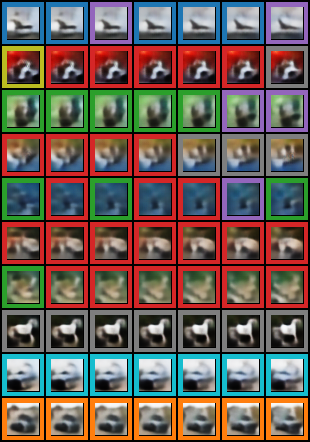

Beta: 10


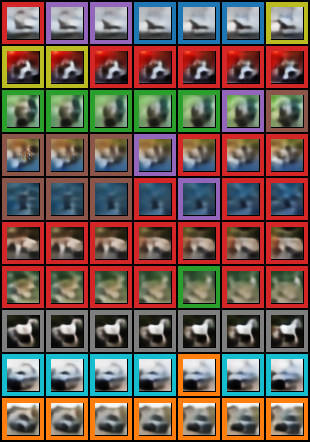

Beta: 11


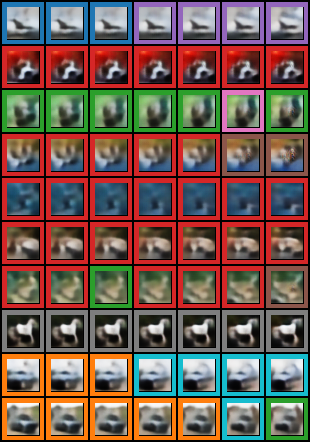

Beta: 12


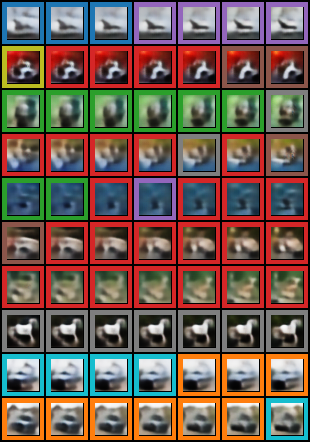

Beta: 13


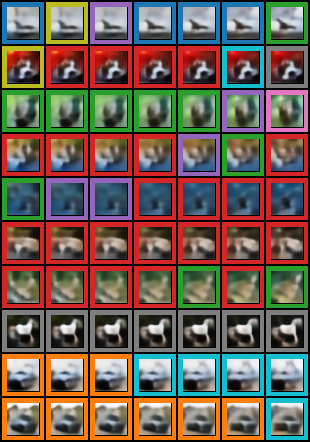

Beta: 14


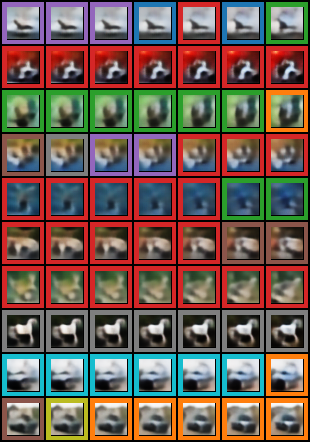

Beta: 15


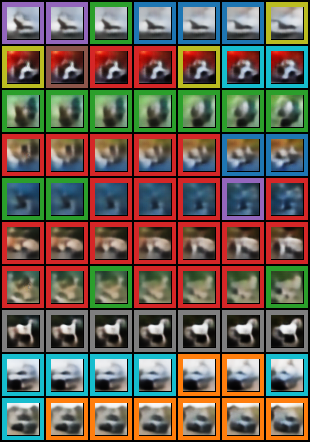

Beta: 16


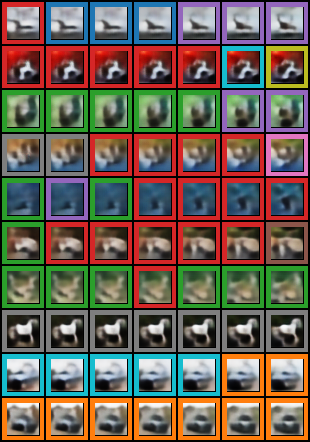

Beta: 17


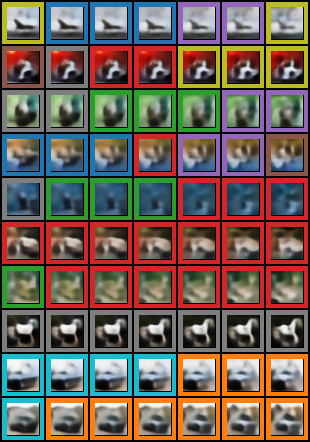

Beta: 18


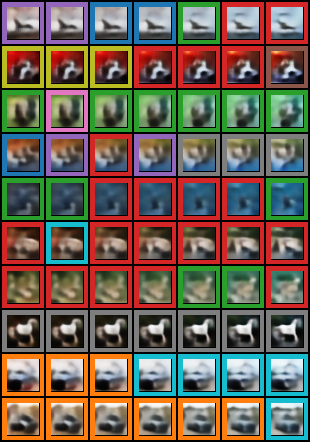

Beta: 19


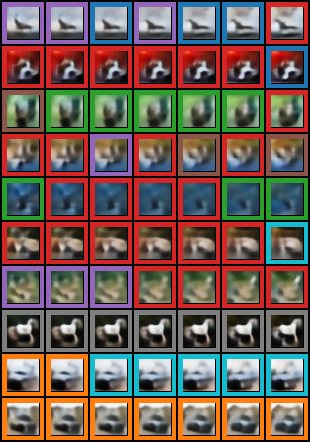

Beta: 20


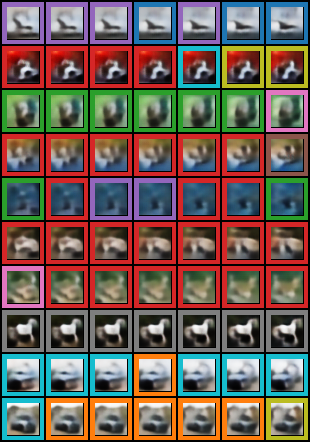

Beta: 21


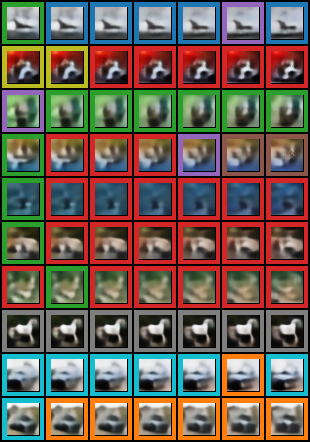

Beta: 22


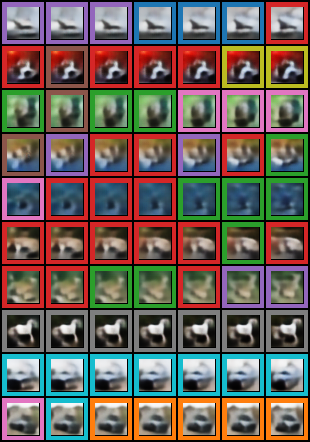

In [ ]:
config_path = 'config/cifar_all.yml'
config = prepare_config(config_path, local=True)
seed_everything(config['seed'])
print("Number of alpha-values:", config['n_alpha'])
print("Number of beta-values:", config['n_beta'])
show_experiment_results(config)